<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf


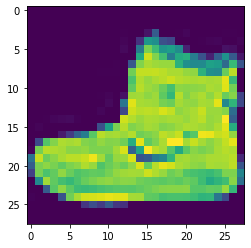

In [5]:
plt.imshow(x_train[0])

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [6]:
np.max(x_train)

255

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train[0:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [11]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [12]:
y_train_cat[0], y_test_cat

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [13]:
input_shape = x_train.shape[1:]
input_shape

(28, 28, 1)

In [36]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D


model = Sequential()

model.add(Input(shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu'))

# model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=x_train.shape[1:], activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [39]:
model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_test, y_test_cat), batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 463us/sample - loss: 0.0669 - accuracy: 0.9754 - val_loss: 0.3364 - val_accuracy: 0.9124
Epoch 2/10
60000/60000 [==============================] - 27s 458us/sample - loss: 0.0616 - accuracy: 0.9770 - val_loss: 0.3325 - val_accuracy: 0.9123
Epoch 3/10
60000/60000 [==============================] - 28s 459us/sample - loss: 0.0515 - accuracy: 0.9812 - val_loss: 0.3685 - val_accuracy: 0.9165
Epoch 4/10
60000/60000 [==============================] - 28s 459us/sample - loss: 0.0440 - accuracy: 0.9839 - val_loss: 0.4172 - val_accuracy: 0.9078
Epoch 5/10
60000/60000 [==============================] - 28s 462us/sample - loss: 0.0396 - accuracy: 0.9852 - val_loss: 0.4143 - val_accuracy: 0.9118
Epoch 6/10
60000/60000 [==============================] - 28s 472us/sample - loss: 0.0371 - accuracy: 0.9865 - val_loss: 0.4368 - val_accuracy: 0.9163
Epoch 7/10
60000/60000 [====================

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [43]:
history = pd.DataFrame(model.history.history)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

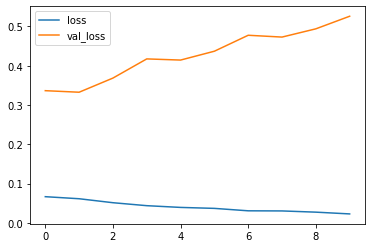

In [47]:
history[['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(x_test, y_test_cat, verbose=2)

In [ ]:
y_test_hat= model.predict_classes(x_test)

In [ ]:
y_test_hat

In [ ]:
print(classification_report(y_test, y_test_hat))

In [ ]:
print(confusion_matrix(y_test, y_test_hat))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_test_hat), annot=True, cmap='coolwarm')

# Great Job!